In [14]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('student-mat.csv')

In [15]:
df.sample()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
28,GP,M,16,U,LE3,A,3,4,services,other,...,5,3,3,1,1,5,4,11,11,11


In [16]:
df.isnull().mean()*100

school        0.0
sex           0.0
age           0.0
address       0.0
famsize       0.0
Pstatus       0.0
Medu          0.0
Fedu          0.0
Mjob          0.0
Fjob          0.0
reason        0.0
guardian      0.0
traveltime    0.0
studytime     0.0
failures      0.0
schoolsup     0.0
famsup        0.0
paid          0.0
activities    0.0
nursery       0.0
higher        0.0
internet      0.0
romantic      0.0
famrel        0.0
freetime      0.0
goout         0.0
Dalc          0.0
Walc          0.0
health        0.0
absences      0.0
G1            0.0
G2            0.0
G3            0.0
dtype: float64

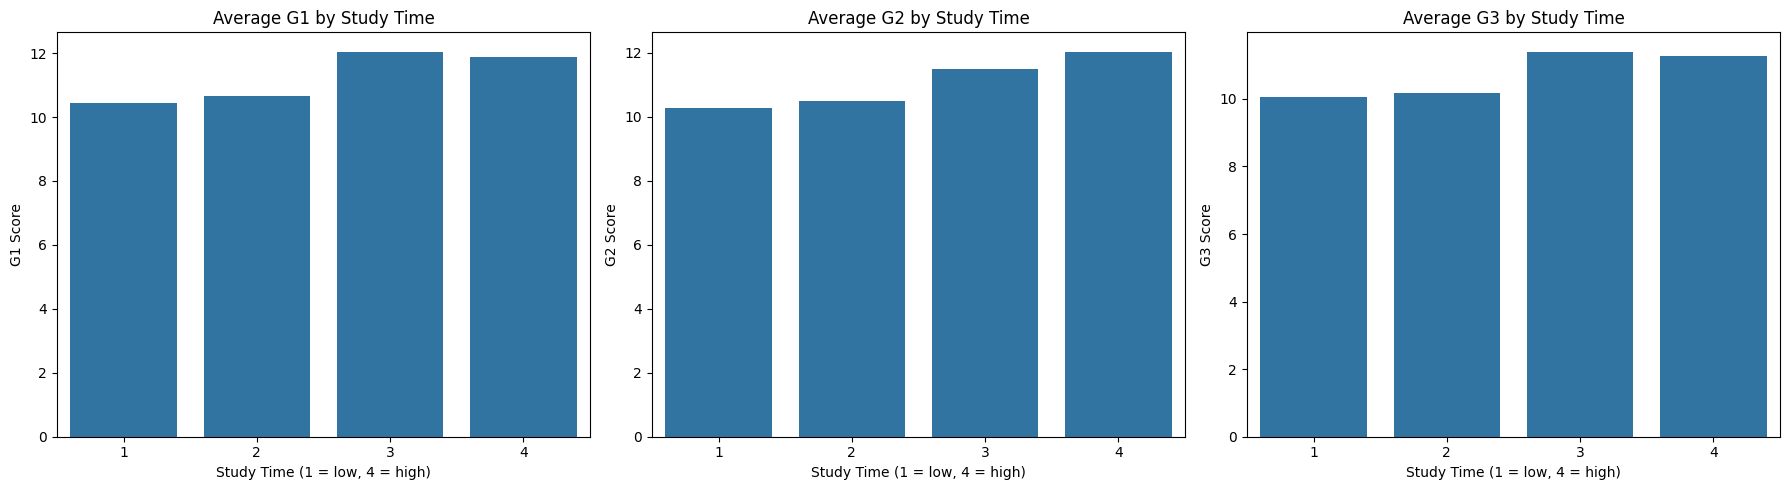

In [17]:
grades = ['G1', 'G2', 'G3']
plt.figure(figsize=(18, 5))
for i, grade in enumerate(grades):
    plt.subplot(1, 3, i + 1)
    sns.barplot(x='studytime', y=grade, data=df, ci=None)
    plt.title(f'Average {grade} by Study Time')
    plt.xlabel('Study Time (1 = low, 4 = high)')
    plt.ylabel(f'{grade} Score')
plt.tight_layout()
plt.show()


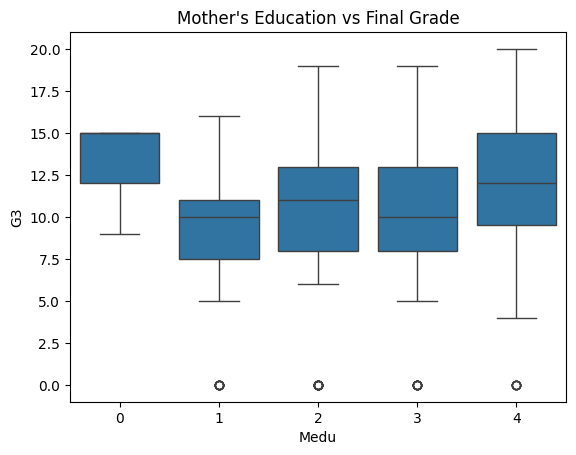

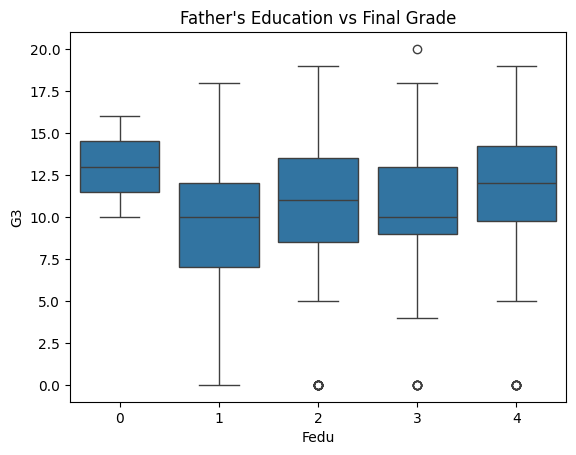

In [19]:
sns.boxplot(x='Medu', y='G3', data=df)
plt.title("Mother's Education vs Final Grade")
plt.show()

sns.boxplot(x='Fedu', y='G3', data=df)
plt.title("Father's Education vs Final Grade")
plt.show()


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd

# Load the dataset
df = pd.read_csv("student-mat.csv")

# One-hot encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)


In [6]:
from sklearn.preprocessing import LabelEncoder

# Label encode categorical columns
for col in df.select_dtypes(include='object'):
    df[col] = LabelEncoder().fit_transform(df[col])

# Optionally scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(df.drop('G3', axis=1))
y = df['G3']


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)


RandomForestRegressor()

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = rf.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.8234316788047384
MSE: 3.6205417721518995


In [11]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

accuracy = 100 - (mae / y_test.mean() * 100)
print("Approximate Accuracy (%):", accuracy)


Mean Absolute Error: 1.1349367088607596
Approximate Accuracy (%): 89.4641598119859
